In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

In [2]:
td = pd.read_csv("movies_data_clear.csv", sep=",", encoding="utf-8", low_memory=False)
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44048 entries, 0 to 44047
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            44048 non-null  int64  
 1   adult                 44048 non-null  bool   
 2   budget                44048 non-null  float64
 3   genres                44048 non-null  object 
 4   id                    44048 non-null  int64  
 5   imdb_id               44048 non-null  object 
 6   original_language     44048 non-null  object 
 7   original_title        44048 non-null  object 
 8   overview              44048 non-null  object 
 9   popularity            44048 non-null  float64
 10  poster_path           44048 non-null  object 
 11  production_companies  44048 non-null  object 
 12  production_countries  44048 non-null  object 
 13  release_date          44048 non-null  object 
 14  revenue               44048 non-null  float64
 15  runtime            

In [ ]:
td["release_date"] = pd.to_datetime(td["release_date"], errors="coerce")
td["Decade"] = (td["release_date"].dt.year // 10) *10
td["Decade"] = td["Decade"].astype("int64")
td["Decade"] = td["Decade"].sort_values()
td[["title", "Decade"]]


In [ ]:
# Conteo de generos por decadas.
td["genres"] = td["genres"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else x)
genre_trends = td.explode("genres").groupby(["Decade", "genres"]).size().reset_index(name="count")
genre_trends_filter = genre_trends[genre_trends["Decade"] >= 1950]
genre_trends_filter = genre_trends_filter[genre_trends_filter["Decade"] != 2020]
genre_trends_filter

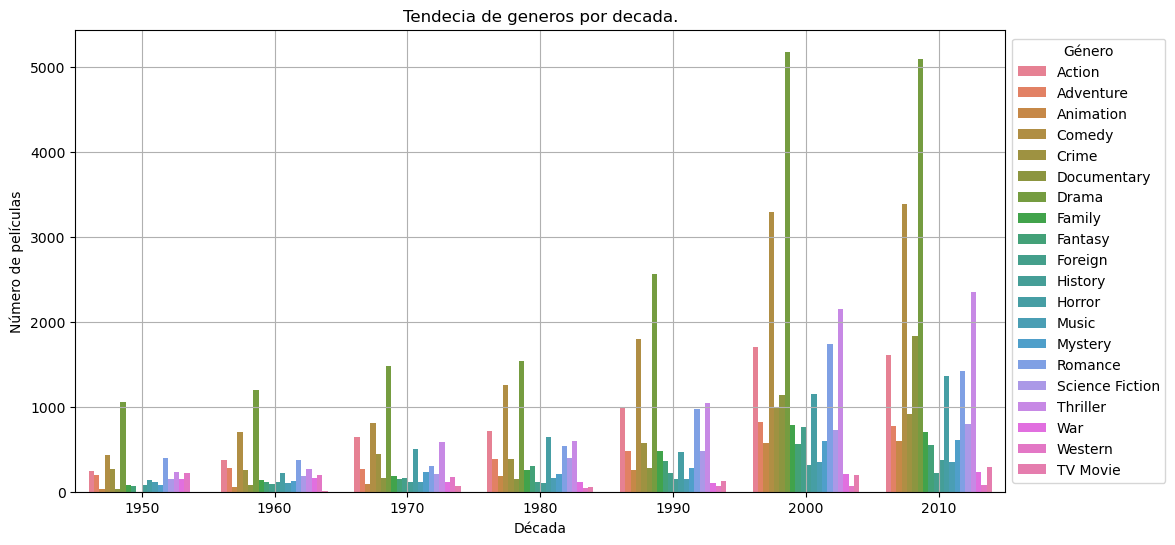

In [29]:
# Representación Gráfica de la tendencia de generos por decada.
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_trends_filter, x="Decade", y="count", hue="genres")

plt.title("Tendecia de generos por decada.")
plt.xlabel("Década")
plt.ylabel("Número de películas")
plt.legend(title="Género", loc="center left", bbox_to_anchor=(1, 0.5))  # Mueve la legenda a la derecha fuera del gráfico.
plt.grid(True)


In [30]:
genre_trends_filter.to_csv("tendencias de genero por decadas.csv")